In [1]:
!pip install changeforest numpy


In [2]:
import numpy as np

# Create a covariance matrix Sigma with 0.7 off-diagonal and 1 on-diagonal values
Sigma = np.full((5, 5), 0.7)
np.fill_diagonal(Sigma, 1)

# Set the random seed and generate the data
rng = np.random.default_rng(12)
X = np.concatenate(
    (
        # 200 samples from standard normal distribution (mean=0, std=1)
        rng.normal(0, 1, (200, 5)),
        
        # 200 samples from a multivariate normal distribution with the specified Sigma
        rng.multivariate_normal(np.zeros(5), Sigma, 200, method="cholesky"),
        
        # Another 200 samples from standard normal distribution (mean=0, std=1)
        rng.normal(0, 1, (200, 5)),
    ),
    axis=0
)

# Show the shape of X to verify
X.shape


(600, 5)

In [3]:
from changeforest import changeforest

# Apply the change detection algorithm
result = changeforest(X, "random_forest", "bs")

# Display the result
result


                    best_split max_gain p_value
(0, 600]                   400   14.814   0.005
 ¦--(0, 400]               200   59.314   0.005
 ¦   ¦--(0, 200]             6    -1.95    0.67
 ¦   °--(200, 400]         393   -8.668    0.81
 °--(400, 600]             412   -9.047    0.66

C:\Users\ARUN ASHOK\AppData\Local\Temp\ipykernel_27012\3543690264.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  result.plot().show()


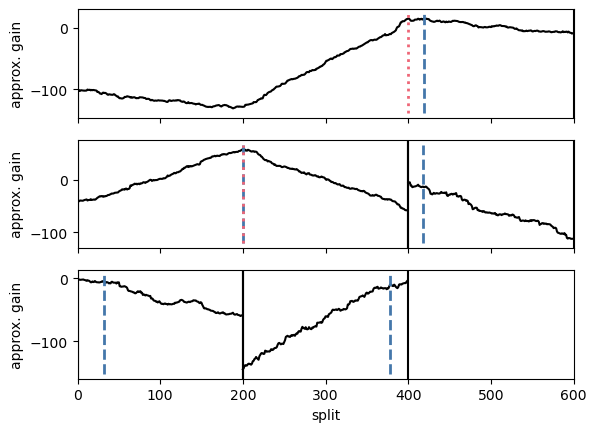

In [4]:
# Plot the result of the change detection
result.plot().show()


C:\Users\ARUN ASHOK\AppData\Local\Temp\ipykernel_27012\2819844086.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  result.optimizer_result.plot().show()


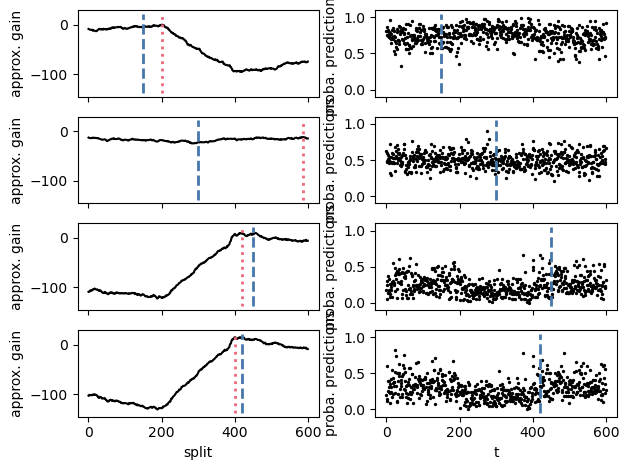

In [5]:
# Plot the optimizer result
result.optimizer_result.plot().show()


In [6]:
from changeforest import Control, changeforest

# Run change detection with random forest and bootstrap method, setting random_forest_n_estimators to 50
result = changeforest(X, "random_forest", "bs", Control(random_forest_n_estimators=50))

# Display the result
result


                    best_split max_gain p_value
(0, 600]                   416    7.463    0.01
 ¦--(0, 416]               200   43.935   0.005
 ¦   ¦--(0, 200]           193  -14.993   0.945
 ¦   °--(200, 416]         217    -9.13   0.085
 °--(416, 600]             591   -12.07       1

In [7]:
from changeforest import changeforest

# Run change detection using the change_in_mean method and bootstrap method
result = changeforest(X, "change_in_mean", "bs")

# Display the result
result


          best_split max_gain p_value
(0, 600]         589    8.625        